# Лабораторная работа №3
## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
#### Цель лабораторной работы:
 
 изучение способов предварительной обработки данных для дальнейшего формирования моделей.

#### Задание:
##### 1) Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
##### 2) Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
#####  a) обработку пропусков в данных (не менее 3 признаков);
#####  b) кодирование категориальных признаков (не менее 3 признаков);
#####  c) масштабирование данных (не менее 3 признаков).

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [14]:
data = pd.read_csv('C:/Dataset/dataset-limpo.csv', sep=",")

Размер набора данных:

In [15]:
total_count = data.shape
print('Всего строк: {}'.format(total_count[0]))
print('Всего колонок: {}'.format(total_count[1]))

Всего строк: 12899
Всего колонок: 36


Тип каждого столбца

In [16]:
data.dtypes

id                      int64
bairro                 object
created_at             object
descricao              object
endereco               object
id.1                    int64
ip_address_origin      object
latitude              float64
longitude             float64
registrou_bo           object
sexo                    int64
tipo_assalto_id         int64
titulo                 object
uri                    object
user_id               float64
valor_prejuizo        float64
Bicicleta              object
Bolsa ou Mochila       object
Carteira               object
Cartão de Crédito      object
Celular                object
Computador             object
DVD                    object
Dinheiro               object
Documentos             object
Equipamento de Som     object
Estepe                 object
MP4 ou Ipod            object
Móveis                 object
Notebook               object
Outros                 object
Relógio                object
Som                    object
Tablet    

Проверка на пустые значения

In [17]:
data.isnull().sum()

id                        0
bairro                 1703
created_at                0
descricao                 1
endereco                  0
id.1                      0
ip_address_origin      1194
latitude                  0
longitude                 0
registrou_bo            524
sexo                      0
tipo_assalto_id           0
titulo                    0
uri                       0
user_id               11733
valor_prejuizo            0
Bicicleta             12643
Bolsa ou Mochila       9268
Carteira               8656
Cartão de Crédito     10123
Celular                4522
Computador            12787
DVD                   12805
Dinheiro              11169
Documentos             9239
Equipamento de Som    12660
Estepe                12575
MP4 ou Ipod           12347
Móveis                12854
Notebook              12135
Outros                 7656
Relógio               11549
Som                   12793
Tablet                12456
Tv                    12721
time                

Первые 5 строк

In [18]:
data.head()

,id,bairro,created_at,descricao,endereco,id.1,ip_address_origin,latitude,longitude,registrou_bo,...,Estepe,MP4 ou Ipod,Móveis,Notebook,Outros,Relógio,Som,Tablet,Tv,time
0,49787,Butantã,2015-06-16 23:34:01.000,"5 bandidos, armas, entraram em casa e vasculha...","Avenida Trona Constanzo, 177, Butantã",49787,NaN,-23.580973,-46.719192,True,...,NaN,True,NaN,True,NaN,NaN,True,True,True,2010-12-20 20:30:00.000
1,10679,Itaquera,2013-09-11 18:26:31.819,"Meu caso foi para o Pequenas Causas, ganhamos ...","Avenida José Pinheiro Borges, 450-876 - Itaque...",10679,187.11.1.51,-23.540105,-46.462872,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
2,10682,Itaquera,2013-09-11 18:42:07.858,"Meu caso foi para o Pequenas Causas, ganhamos ...",Rua Corínthians - Itaquera - Shopping Metrô It...,10682,189.19.160.82,-23.541765,-46.469562,True,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,2012-01-11 14:00:00.000
3,6166,Morumbi,2013-08-20 11:56:52.717,"Estava parada no semáforo, o bandido veio e es...","Rua Pasquale Gallupi, 347 - Morumbi, São Paulo...",6166,199.67.140.46,-23.611693,-46.725935,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-11 18:20:00.000
4,6521,Alto de Pinheiros,2013-08-20 17:41:21.569,Arrombaram o porta malas do meu carro e levara...,"Avenida Professor Fonseca Rodrigues, 1655 - Al...",6521,187.92.158.154,-23.544564,-46.721567,True,...,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,2012-01-11 08:15:00.000


### 1. Обработкa пропусков в данных

Выберем  колонки с пропущенными значениями

In [19]:
num_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка bairro. Тип данных object. Количество пустых значений 1703, 13.2%.
Колонка descricao. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка ip_address_origin. Тип данных object. Количество пустых значений 1194, 9.26%.
Колонка registrou_bo. Тип данных object. Количество пустых значений 524, 4.06%.
Колонка Bicicleta. Тип данных object. Количество пустых значений 12643, 98.02%.
Колонка Bolsa ou Mochila. Тип данных object. Количество пустых значений 9268, 71.85%.
Колонка Carteira. Тип данных object. Количество пустых значений 8656, 67.11%.
Колонка Cartão de Crédito. Тип данных object. Количество пустых значений 10123, 78.48%.
Колонка Celular. Тип данных object. Количество пустых значений 4522, 35.06%.
Колонка Computador. Тип данных object. Количество пустых значений 12787, 99.13%.
Колонка DVD. Тип данных object. Количество пустых значений 12805, 99.27%.
Колонка Dinheiro. Тип данных object. Количество пустых значений 11169, 86.59%.
Колонка Documentos. Тип данных object. Ко

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [23]:
cat_temp_data_registr = data[['registrou_bo']]
cat_temp_data_registr['registrou_bo'].unique()

array([True, False, nan], dtype=object)

Импьютация наиболее частыми значениями

In [24]:
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp1 = imp1.fit_transform(cat_temp_data_registr)
data_imp1

array([[True],
       [True],
       [True],
       ...,
       [False],
       [True],
       [False]], dtype=object)

Пустые значения отсутствуют

In [25]:
np.unique(data_imp1)

array([False, True], dtype=object)

In [27]:
cat_temp_data_dvd = data[['bairro']]
cat_temp_data_dvd['bairro'].unique()

array(['Butantã', 'Itaquera', 'Morumbi', ..., 'Rua Carlos Sampaio',
       'Vila Maracana', 'Vila Joao Ramalho'], dtype=object)

Импьютация наиболее частыми значениями

In [28]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data_dvd)
data_imp2

array([['Butantã'],
       ['Itaquera'],
       ['Itaquera'],
       ...,
       ['Vila Joao Ramalho'],
       ['Campo Belo'],
       ['Pinheiros']], dtype=object)

Пустые значения отсутствуют

In [29]:
np.unique(data_imp2)

array(['9 de Julho', 'Aclimação', 'Alameda Joaquim Eugênio de Lima', ...,
       'ヴィーラ・モルンビ', 'ヴィーラ・モレイラ', 'ヴィーラ・レイス'], dtype=object)

In [30]:
cat_temp_data_ip = data[['ip_address_origin']]
cat_temp_data_ip['ip_address_origin'].unique()

array([nan, '187.11.1.51', '189.19.160.82', ..., '189.100.243.242',
       '189.38.212.209', '177.103.229.244'], dtype=object)

Импьютация константой

In [31]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='192.0.0.1')
data_imp3 = imp3.fit_transform(cat_temp_data_ip)
data_imp3

array([['192.0.0.1'],
       ['187.11.1.51'],
       ['189.19.160.82'],
       ...,
       ['177.103.229.244'],
       ['200.161.48.250'],
       ['177.32.220.159']], dtype=object)

Пустые значения отсутствуют

In [32]:
np.unique(data_imp3)

array(['104.129.196.99', '104.129.198.64', '104.132.119.91', ...,
       '95.22.55.157', '95.233.181.88', '98.210.7.128'], dtype=object)

### 2. Кодирование категориальных признаков

2.1. Кодирование категорий целочисленными значениями

In [33]:
cat_enc = pd.DataFrame({'c1':data_imp1.T[0]})
cat_enc

,c1
0,True
1,True
2,True
3,True
4,True
...,...
12894,False
12895,True
12896,False
12897,True


In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [35]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array([True, False], dtype=object)

In [36]:
np.unique(cat_enc_le)

array([0, 1])

In [38]:
le.inverse_transform([ 0,  1])

array([False, True], dtype=object)

2.2. Кодирование категорий наборами бинарных значений

In [39]:
cat_enc2 = pd.DataFrame({'c2':data_imp2.T[0]})
cat_enc2

,c2
0,Butantã
1,Itaquera
2,Itaquera
3,Morumbi
4,Alto de Pinheiros
...,...
12894,Jardim das Camelias
12895,Jardim Paulista
12896,Vila Joao Ramalho
12897,Campo Belo


In [40]:
ohe = OneHotEncoder()
cat_enc2_ohe = ohe.fit_transform(cat_enc2[['c2']])
cat_enc2_ohe

<12899x1577 sparse matrix of type '<class 'numpy.float64'>'
	with 12899 stored elements in Compressed Sparse Row format>

In [41]:
cat_enc2_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
cat_enc2.head(10)

,c2
0,Butantã
1,Itaquera
2,Itaquera
3,Morumbi
4,Alto de Pinheiros
5,Butantã
6,Sumaré
7,Vila Mariana
8,Barra Funda
9,Santana


2.3. Быстрый вариант one-hot кодирования

In [43]:
cat_enc3 = pd.DataFrame({'c3':data_imp3.T[0]})
cat_enc3

,c3
0,192.0.0.1
1,187.11.1.51
2,189.19.160.82
3,199.67.140.46
4,187.92.158.154
...,...
12894,189.100.243.242
12895,189.38.212.209
12896,177.103.229.244
12897,200.161.48.250


In [44]:
pd.get_dummies(cat_enc).head()

,c1_False,c1_True
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [46]:
pd.get_dummies(cat_temp_data_ip, dummy_na=True).head()

,ip_address_origin_104.129.196.99,ip_address_origin_104.129.198.64,ip_address_origin_104.132.119.91,ip_address_origin_107.167.108.172,ip_address_origin_107.167.108.182,ip_address_origin_107.167.111.82,ip_address_origin_107.167.113.134,ip_address_origin_107.167.116.246,ip_address_origin_107.178.37.127,ip_address_origin_107.204.70.37,...,ip_address_origin_87.216.218.39,ip_address_origin_89.65.15.184,ip_address_origin_90.207.84.224,ip_address_origin_92.137.216.248,ip_address_origin_93.104.191.160,ip_address_origin_93.108.150.250,ip_address_origin_95.22.55.157,ip_address_origin_95.233.181.88,ip_address_origin_98.210.7.128,ip_address_origin_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3. Масштабирование данных

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

3.1. MinMax масштабирование

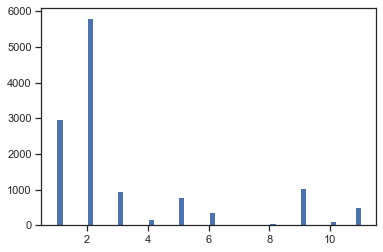

In [52]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['tipo_assalto_id']])
plt.hist(data['tipo_assalto_id'], 50)
plt.show()

3.2. Масштабирование данных на основе Z-оценки

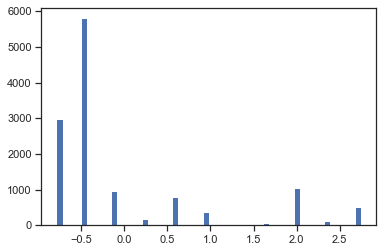

In [51]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['tipo_assalto_id']])

plt.hist(sc2_data, 50)
plt.show()

3.3. Нормализация данных

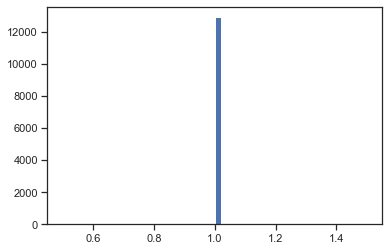

In [53]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['tipo_assalto_id']])

plt.hist(sc3_data, 50)
plt.show()